In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
X = np.linspace(0, 10, 100)

In [ ]:
X

In [ ]:
X.shape

In [ ]:
X[90:]

In [ ]:
X[1]

In [ ]:
y_linear = 0.5 * X + 10 + np.random.normal(loc = 0, scale=1.5, size=100)

In [ ]:
import pandas as pd

In [42]:
df = pd.DataFrame({"nombre horrible": X, "y": y_linear})

In [ ]:
df

In [37]:
df.query("y > 8")

,x,y
0,0.00000,13.133654
1,0.10101,10.183393
2,0.20202,8.617581
3,0.30303,10.096788
4,0.40404,10.158467
...,...,...
95,9.59596,14.191967
96,9.69697,13.662519
97,9.79798,16.240896
98,9.89899,13.852240


In [54]:
diccionario_clase = {"a": 1, "b": np.array([0, 1, 2, 3]), "c": "caracter"}

In [56]:
for llave, valor in diccionario_clase.items():
    print(f"La llave es {llave} y el valor es {valor} y el tipo de dato es {type(valor)}")

La llave es a y el valor es 1 y el tipo de dato es <class 'int'>
La llave es b y el valor es [0 1 2 3] y el tipo de dato es <class 'numpy.ndarray'>
La llave es c y el valor es caracter y el tipo de dato es <class 'str'>


In [61]:
df.rename(columns={"nombre horrible": "x", "y": "y_nueva"}, inplace=True)

In [62]:
df

,x,y_nueva
0,0.00000,13.133654
1,0.10101,10.183393
2,0.20202,8.617581
3,0.30303,10.096788
4,0.40404,10.158467
...,...,...
95,9.59596,14.191967
96,9.69697,13.662519
97,9.79798,16.240896
98,9.89899,13.852240


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Variable dependiente (y)')

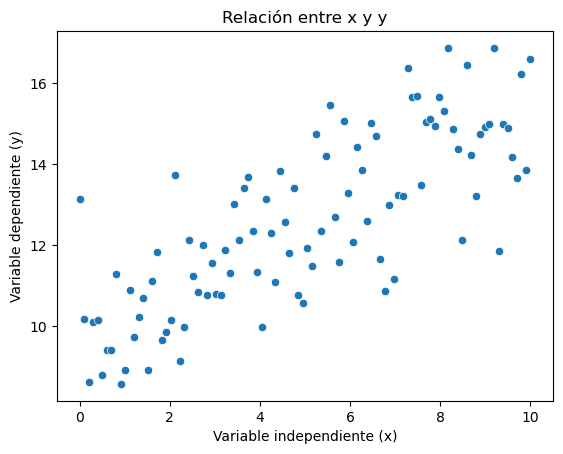

In [67]:
sns.scatterplot(data=df, x="x", y="y_nueva")
plt.title("Relación entre x y y")
plt.xlabel("Variable independiente (x)")
plt.ylabel("Variable dependiente (y)")

In [81]:
def genera_grafica_dispersion(
        data_frame:pd.DataFrame, # Necesita el dataframe donde contenga las variables a gráficar
        x_col:str="x",              # Necesita el nombre de la columna en el eje x (para esto necesita existir dentro del data_frame)
        y_col:str="y",
        nombre_eje_x:str="",
        nombre_eje_y:str="",
        titulo:str=""
    ) -> None:
    # Crea una gráfica de dispersión
    sns.scatterplot(data=data_frame, x=x_col, y=y_col)
    plt.title(titulo) # Asigna el titulo del gráfico
    plt.xlabel(nombre_eje_x) # Asigna el noombre del eje x
    plt.xlabel(nombre_eje_y) # Asigna el noombre del eje y

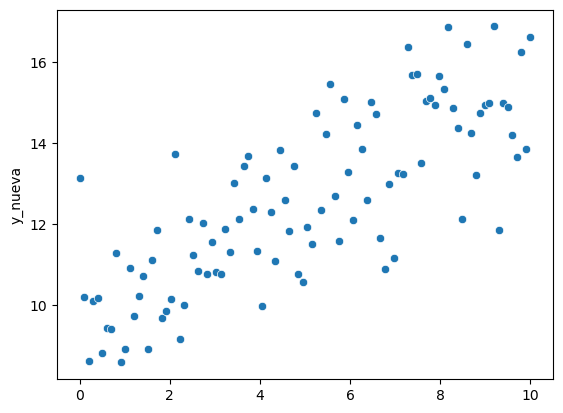

In [80]:
genera_grafica_dispersion(data_frame=df, x_col="x", y_col="y_nueva")

In [95]:
def generar_datos_lineales(
        n:int=100,
        slope:float=0.5,
        intercept:float=1,
        noise_scale:float=1.5
    ) -> pd.DataFrame:
    X = np.linspace(0, 10, n)
    y = slope * X + intercept + np.random.normal(scale=noise_scale, size=n)
    df = pd.DataFrame({"x": X, "y": y})
    return df

In [93]:
df.y.quantile(q=[0.25, .35, 0.99, 0.999])

0.250    10.868516
0.350    11.536094
0.990    16.866104
0.999    16.875812
Name: y, dtype: float64

In [86]:
df.rename(columns={"y_nueva": "y"}, inplace=True)

In [96]:
generar_datos_lineales()

,x,y
0,0.00000,1.020119
1,0.10101,0.056355
2,0.20202,3.286368
3,0.30303,1.533889
4,0.40404,0.180485
...,...,...
95,9.59596,2.388870
96,9.69697,7.213812
97,9.79798,4.466958
98,9.89899,5.551479


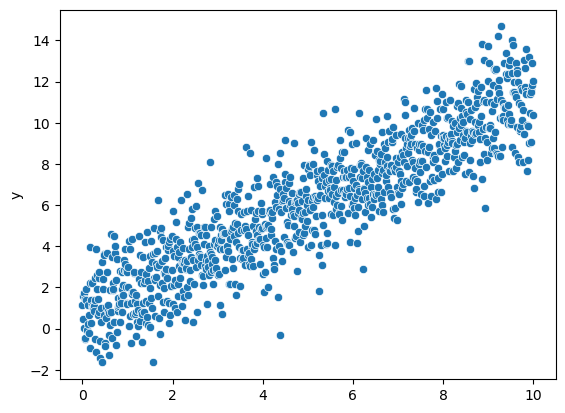

In [105]:
df = generar_datos_lineales(n=1000, slope=1, noise_scale = 1.5)
genera_grafica_dispersion(df)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
KNeighborsRegressor

In [107]:
lr = LinearRegression()

In [108]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
type(df[["x"]])

pandas.core.frame.DataFrame

In [112]:
type(df["y"])

pandas.core.series.Series

In [114]:
columnas_explicativas = ["x"]

In [115]:
lr.fit(df[columnas_explicativas], df["y"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
y_pred_lr = lr.predict(df[["x"]])

In [119]:
df["y_pred_lr"] = y_pred_lr

In [120]:
df

,x,y,y_pred_lr
0,0.00000,1.162793,0.798914
1,0.01001,1.593938,0.809387
2,0.02002,0.453969,0.819860
3,0.03003,0.039567,0.830333
4,0.04004,1.722552,0.840807
...,...,...,...
995,9.95996,11.487141,11.219591
996,9.96997,11.854447,11.230065
997,9.97998,12.920149,11.240538
998,9.98999,10.354840,11.251011


In [127]:
# KNN

## 1. Definir el modelo
knr = KNeighborsRegressor()

## 2. Ajustar el modelo
knr.fit(df[["x"]], df.y)

## 3. Predicciones
y_pred_knr = knr.predict(df[["x"]])

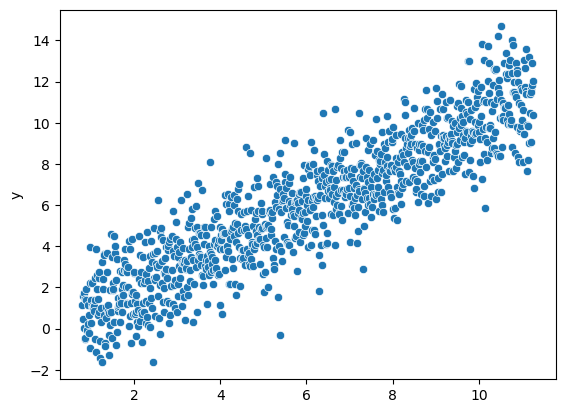

In [122]:
genera_grafica_dispersion(df, x_col = "y_pred_lr", y_col="y")

<Axes: xlabel='x', ylabel='y'>

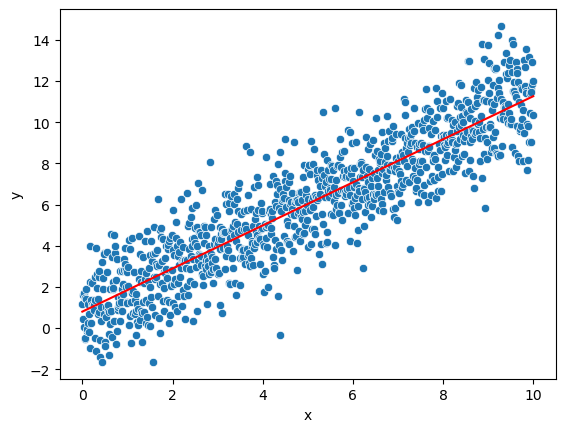

In [ ]:
sns.scatterplot(x="x", y="y", data=df)
sns.lineplot(x="x", y="y_pred_lr", data=df, color="red")
KNeighborsRegressor()

In [208]:
def grafica_datos(df:pd.DataFrame, eje_x:str = "x", eje_y:str = "y") -> None:
    sns.scatterplot(x=eje_x, y=eje_y, data=df)
    plt.xlabel(eje_x)
    plt.ylabel(eje_y)
    plt.show()

In [ ]:
mean_squared_error(df.y, y_pred_lr)

In [128]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(df[["x"]], df["y"])

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [129]:
y_pred_knn10 = knn.predict(df[["x"]])

In [130]:
df["y_pred_knn10"] = y_pred_knn10

In [131]:
df

,x,y,y_pred_lr,y_pred_knn10
0,0.00000,1.162793,0.798914,0.875915
1,0.01001,1.593938,0.809387,0.875915
2,0.02002,0.453969,0.819860,0.875915
3,0.03003,0.039567,0.830333,0.875915
4,0.04004,1.722552,0.840807,0.875915
...,...,...,...,...
995,9.95996,11.487141,11.219591,11.441505
996,9.96997,11.854447,11.230065,11.441505
997,9.97998,12.920149,11.240538,11.441505
998,9.98999,10.354840,11.251011,11.441505


<Axes: xlabel='x', ylabel='y'>

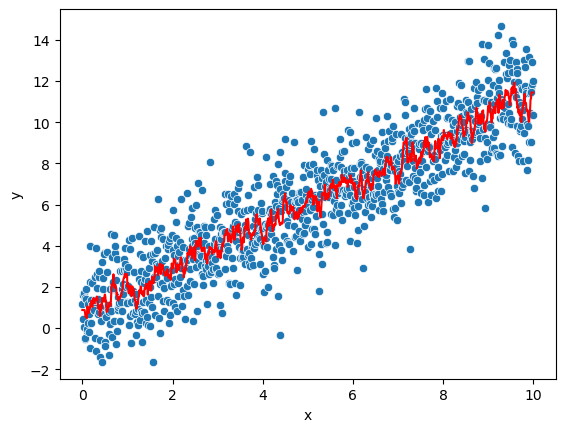

In [132]:
sns.scatterplot(x="x", y="y", data=df)
sns.lineplot(x="x", y="y_pred_knn10", data=df, color="red")

In [ ]:
def grafica_datos_con_modelos(df:pd.DataFrame, modelo:str, eje_x:str = "x", eje_y:str = "y") -> None:
    sns.scatterplot(x=eje_x, y=eje_y, data=df)
    sns.lineplot(x=ej
    e_x, y=modelo, data=df, color="red")
    plt.xlabel(eje_x)
    plt.ylabel(eje_y)
    plt.show()

In [ ]:
grafica_datos_con_modelos(df, "y_pred_knn10")

In [148]:
def predict_knn(df:pd.DataFrame, y:str = "y", k:int=10) -> np.ndarray:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(df.drop(columns=y), df[y])
    return knn.predict(df.drop(columns=y))

In [149]:
def predict_lr(df:pd.DataFrame, y:str = "y") -> np.ndarray:
    lr = LinearRegression()
    lr.fit(df.drop(columns=y), df[y])
    return lr.predict(df.drop(columns=y))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(df.y, y_pred_lr)

2.145089117585321

In [ ]:
mean_squared_error(df.y, y_pred_knn10)

2.001406692620967

In [139]:
x = 5.9898765764654

In [ ]:
print(f"{mean_squared_error(df.y, y_pred_lr):.2f}")

In [ ]:
print(f"{mean_squared_error(df.y, y_pred_knn10):.2f}")

In [146]:
print(f"MSE 10 vecinos cercanos:{mean_squared_error(df.y, y_pred_knn10):.2f}")
print(f"MSE regresión lineal:\t{mean_squared_error(df.y, y_pred_lr):.2f}")

MSE 10 vecinos cercanos:2.00
MSE regresión lineal:	2.15


In [168]:
df = df[["x", "y"]]

In [172]:
df1 = df.copy()

In [170]:
df

,x,y
0,0.00000,1.162793
1,0.01001,1.593938
2,0.02002,0.453969
3,0.03003,0.039567
4,0.04004,1.722552
...,...,...
995,9.95996,11.487141
996,9.96997,11.854447
997,9.97998,12.920149
998,9.98999,10.354840


In [173]:
df1

,x,y
0,0.00000,1.162793
1,0.01001,1.593938
2,0.02002,0.453969
3,0.03003,0.039567
4,0.04004,1.722552
...,...,...
995,9.95996,11.487141
996,9.96997,11.854447
997,9.97998,12.920149
998,9.98999,10.354840


In [174]:
df1["y_pred_knn1"] = predict_knn(df, y="y", k=1)
df1["y_pred_knn20"] = predict_knn(df, y="y", k=10)
df1["y_pred_knn100"] = predict_knn(df, y="y", k=100)

In [175]:
df

,x,y
0,0.00000,1.162793
1,0.01001,1.593938
2,0.02002,0.453969
3,0.03003,0.039567
4,0.04004,1.722552
...,...,...
995,9.95996,11.487141
996,9.96997,11.854447
997,9.97998,12.920149
998,9.98999,10.354840


In [187]:
df = generar_datos_lineales(n = 101)
df1 = df

In [188]:
df1["y_pred_knn1"] = predict_knn(df, y="y", k=1)
df1["y_pred_knn20"] = predict_knn(df, y="y", k=10)
df1["y_pred_knn100"] = predict_knn(df, y="y", k=100)

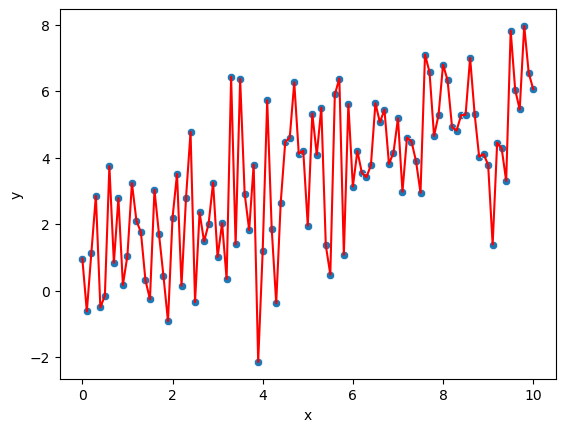

In [189]:
grafica_datos_con_modelos(df1, "y_pred_knn1")

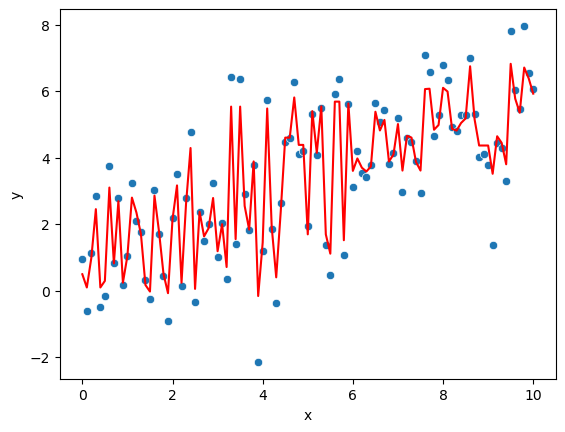

In [190]:
grafica_datos_con_modelos(df1, "y_pred_knn20")

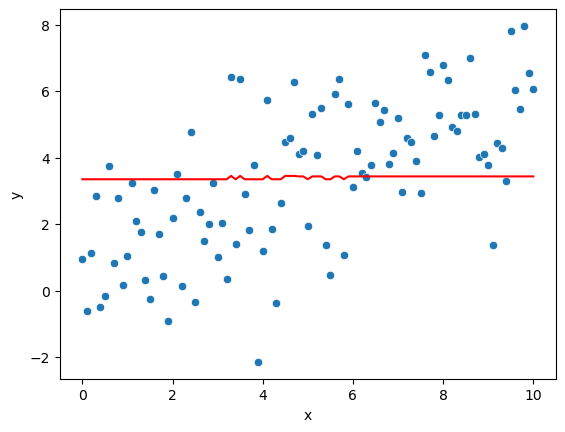

In [191]:
grafica_datos_con_modelos(df1, "y_pred_knn100")

In [ ]:
def evaluate_models(df:pd.DataFrame, y:str="y") -> None:
    for col in df.columns:
        if col.startswith("y_pred_"):
            print(f"MSE {col}:\t{mean_squared_error(df[y], df[col]):.2f}")

In [ ]:
evaluate_models(df, y="y")

In [ ]:
def evaluar_modelos_cambio_muestra(n:int, slope:float=0.5, noise_scale:float=1.5) -> None:  
    df = generar_datos_lineales(n=n, slope=slope, noise_scale=noise_scale)
    df1 = df.copy()
    df1["y_pred_knn1"] = predict_knn(df, y="y", k=1)
    df1["y_pred_knn10"] = predict_knn(df, y="y", k=10)
    df1["y_pred_knn100"] = predict_knn(df, y="y", k=100)
    df1["y_pred_lr"] = predict_lr(df, y="y")
    print("-" * 40)
    print(f"Evaluación con {n} muestras")
    print("-" * 40)
    evaluate_models(df1, y="y")
    print("-" * 40)

In [ ]:
for n in range(1, 10):
    evaluar_modelos_cambio_muestra(n * 100, noise_scale = 10, slope=-20)

In [192]:
N = 10000

In [193]:
df = generar_datos_lineales(n = N, slope = 5, intercept = 5, noise_scale = 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [194]:
df_train, df_test = train_test_split(df, test_size = 0.4)

In [197]:
def evalua_knn(df_train:pd.DataFrame, df_test:pd.DataFrame, y:str="y", k:int=10) -> float:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(df_train.drop(columns=y), df_train[y])
    y_pred = knn.predict(df_test.drop(columns=y))
    return mean_squared_error(df_test[y], y_pred)

In [ ]:
evalua_knn(df_train, df_test, y= "y", k=1)

201.46900674097472

In [201]:
evalua_knn(df_train, df_test, y= "y", k=10)

108.05397552856202

In [203]:
evalua_knn(df_train, df_test, y= "y", k=200)

99.10824065203109

In [204]:
valores_k = np.linspace(1, N*.4, 100, dtype=int)

In [205]:
valores_k

array([   1,   41,   81,  122,  162,  202,  243,  283,  324,  364,  404,
        445,  485,  526,  566,  606,  647,  687,  728,  768,  808,  849,
        889,  930,  970, 1010, 1051, 1091, 1132, 1172, 1212, 1253, 1293,
       1334, 1374, 1414, 1455, 1495, 1535, 1576, 1616, 1657, 1697, 1737,
       1778, 1818, 1859, 1899, 1939, 1980, 2020, 2061, 2101, 2141, 2182,
       2222, 2263, 2303, 2343, 2384, 2424, 2465, 2505, 2545, 2586, 2626,
       2667, 2707, 2747, 2788, 2828, 2868, 2909, 2949, 2990, 3030, 3070,
       3111, 3151, 3192, 3232, 3272, 3313, 3353, 3394, 3434, 3474, 3515,
       3555, 3596, 3636, 3676, 3717, 3757, 3798, 3838, 3878, 3919, 3959,
       4000])

In [206]:
errores = []
for k in valores_k:
    error = evalua_knn(df_train, df_test, y='y', k=k)
    #print(f"MSE para k={k}: {error:.2f}")
    errores.append(error)

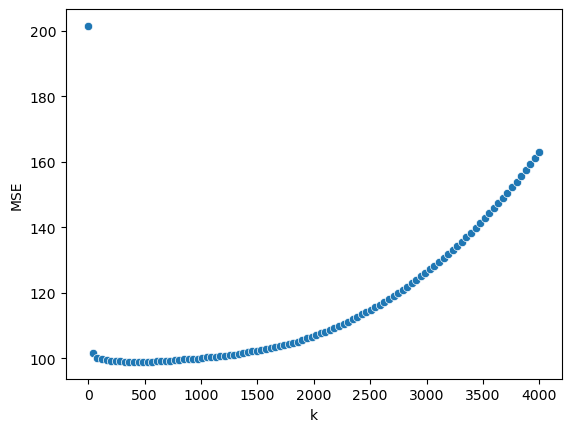

In [209]:
grafica_datos(pd.DataFrame({"k": valores_k, "MSE": errores}), eje_x="k", eje_y="MSE")